<h1>Twitter Financial News NLP Analysis and Prediction</h1>

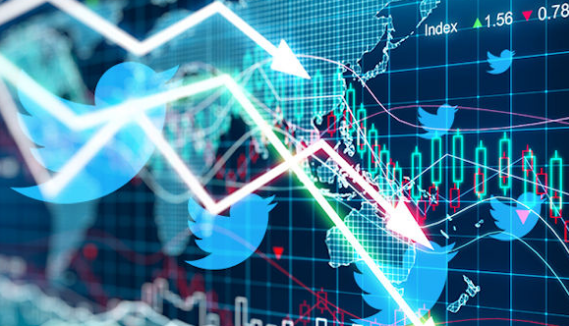


<h3>The Twitter Financial News dataset is an English-language dataset containing an annotated corpus of finance-related tweets. This dataset is used to classify finance-related tweets for their topic.</h3>
Accourding to the main information of "About data" of owner. @Sulphatet

Link of original source:
https://www.kaggle.com/datasets/sulphatet/twitter-financial-news?select=valid_data.csv

<h2> Classified Supervised Modelling</h2>

Steps of Project:
1. Libraries
2. Dataset analysis and information
3. Pre_processing
4. World Cloud
5. Making a dataset
6. featuer scoring by PCA
7. Modelling by Neuralnetwork

<h2>Libraries</h2>

In [1]:
!pip install prince
!pip install preprocessing


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 33.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 31.9 MB/s eta 0:00:00
  DEPRECATION: Building 'nltk' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'nltk'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for nltk: filename=nltk-3.2.4-py3-none-any.whl size=1367710 sha256=ae799ca00ac172c752a2b25817678a427336d0ad20e4c5c6bfabd92d4b8e2f9d
  Stored in directory: /Users/elifonat/Library/Caches/pip/wheels/7c/04/b2/0e35b0db5d974cf9fa16f1a6464f83d3aa672bfe5a22945729
Successfully built nltk
  Attempting uninstall: nltk
    Found existing instal

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


<h2>Loading dataset:<h2>

In [4]:
#Loading dataset:
import pandas as pd
df = pd.read_csv('/Users/elifonat/Desktop/DS675ML/Twitter /train_data.csv')

In [5]:
df

,text,label
0,Here are Thursday's biggest analyst calls: App...,0
1,Buy Las Vegas Sands as travel to Singapore bui...,0
2,"Piper Sandler downgrades DocuSign to sell, cit...",0
3,"Analysts react to Tesla's latest earnings, bre...",0
4,Netflix and its peers are set for a ‘return to...,0
...,...,...
16985,KfW credit line for Uniper could be raised to ...,3
16986,KfW credit line for Uniper could be raised to ...,3
16987,Russian https://t.co/R0iPhyo5p7 sells 1 bln r...,3
16988,Global ESG bond issuance posts H1 dip as supra...,3


In [17]:
text = df["text"].astype(str)
label = df["label"]

In [18]:
#implement a KNN on this dataset
X_train, X_test, y_train, y_test = train_test_split(
    text, label,
    test_size=0.2,        
    random_state=42,
    stratify=label          
)

In [19]:
# TF-IDF tokenization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf = TfidfVectorizer(
    lowercase=True,
    ngram_range=(1,1),    
)

In [23]:
X_train_tokenized = tfidf.fit_transform(X_train)
X_test_tokenized = tfidf.transform(X_test)

In [24]:
knn = KNeighborsClassifier(n_neighbors=5, metric='cosine')
knn.fit(X_train_tokenized, y_train)
predict = knn.predict(X_test_tokenized)

In [25]:
print("Accuracy:", accuracy_score(y_test, predict))

Accuracy: 0.6827545615067687


In [59]:
print("\nClassification report:\n", classification_report(y_test, predict))


Classification report:
               precision    recall  f1-score   support

           0       0.44      0.47      0.45        51
           1       0.56      0.76      0.65       167
           2       0.69      0.76      0.72       709
           3       0.63      0.52      0.57        64
           4       0.79      0.82      0.80        72
           5       0.71      0.90      0.79       198
           6       0.66      0.82      0.73       105
           7       0.68      0.74      0.71       125
           8       0.48      0.61      0.53        33
           9       0.61      0.48      0.54       311
          10       0.57      0.29      0.38        14
          11       0.60      0.33      0.43         9
          12       0.72      0.73      0.73        97
          13       0.57      0.40      0.47        94
          14       0.69      0.70      0.69       364
          15       0.70      0.61      0.65       100
          16       0.81      0.83      0.82       197
  

In [55]:
print("\nConfusion matrix:\n", confusion_matrix(y_test, predict))


Confusion matrix:
 [[ 24   0   5   1   1   2   0   2   0   0   1   0   1   1   2   0   1   0
    5   5]
 [  0 127   5   1   0   0   1   1   1   5   0   0   0   1  19   0   4   0
    2   0]
 [  6  18 541   4   3  10   3   9   0  31   0   2   4  15  22   4   3   6
   26   2]
 [  1   8   8  33   1   0   0   1   0   3   0   0   0   1   3   1   2   0
    2   0]
 [  0   1   2   1  59   4   0   2   0   0   0   0   0   0   0   0   1   0
    1   1]
 [  1   0   5   0   2 178   1   2   0   0   0   0   0   0   0   0   0   0
    7   2]
 [  0   4   3   0   0   0  86   0   0   0   0   0   0   0   7   2   0   0
    3   0]
 [  1   2   8   0   0  11   0  93   0   0   0   0   0   0   1   0   0   1
    5   3]
 [  0   5   0   0   0   0   0   0  20   2   1   0   0   0   1   2   0   0
    2   0]
 [  1  19  40   4   2   6  11   4  10 149   0   0  10   2  27   1  10   0
   15   0]
 [  0   1   3   0   0   0   3   0   1   0   4   0   0   0   0   2   0   0
    0   0]
 [  0   0   3   0   0   1   0   0   0   0   0

In [27]:
# Naive Bayes Implementation
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

naive_model = MultinomialNB()
naive_model.fit(X_train_tokenized, y_train)
predict_naive = naive_model.predict(X_test_tokenized)

print("Naive Bayes accuracy:", accuracy_score(y_test, predict_naive))
print("\nClassification report (Naive Bayes):\n", classification_report(y_test, predict_naive))

print("\nConfusion matrix (Naive Bayes):\n", confusion_matrix(y_test, predict_naive))

Naive Bayes accuracy: 0.5750441436138906

Classification report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.85      0.24      0.37       167
           2       0.42      0.96      0.58       709
           3       1.00      0.05      0.09        64
           4       1.00      0.40      0.57        72
           5       0.96      0.83      0.89       198
           6       1.00      0.19      0.32       105
           7       0.91      0.47      0.62       125
           8       0.00      0.00      0.00        33
           9       0.83      0.44      0.57       311
          10       0.00      0.00      0.00        14
          11       0.00      0.00      0.00         9
          12       1.00      0.21      0.34        97
          13       0.00      0.00      0.00        94
          14       0.51      0.82      0.63       364
          15       1.00      0.09      0.17       100
 

/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [57]:
#Perceptron Implementation
from sklearn.linear_model import Perceptron

percep_model = Perceptron(
    max_iter=1000,
    eta0=0.1,          
    random_state=42,
    n_jobs=-1
)

percep_model.fit(X_train_tokenized, y_train)
percep_model_pred = percep_model.predict(X_test_tokenized)

print("Perceptron accuracy:", accuracy_score(y_test, percep_model_pred))
print("\nClassification report (Perceptron):\n", classification_report(y_test, percep_model_pred))

print("\nConfusion matrix (Perceptron):\n", confusion_matrix(y_test, percep_model_pred))


Perceptron accuracy: 0.794585050029429

Classification report (Perceptron):
               precision    recall  f1-score   support

           0       0.68      0.53      0.59        51
           1       0.81      0.82      0.82       167
           2       0.81      0.80      0.81       709
           3       0.63      0.77      0.69        64
           4       0.93      0.94      0.94        72
           5       0.94      0.96      0.95       198
           6       0.88      0.87      0.87       105
           7       0.81      0.80      0.80       125
           8       0.67      0.61      0.63        33
           9       0.78      0.64      0.70       311
          10       0.57      0.86      0.69        14
          11       0.13      0.89      0.22         9
          12       0.88      0.88      0.88        97
          13       0.79      0.66      0.72        94
          14       0.75      0.78      0.77       364
          15       0.78      0.73      0.75       100
    

In [46]:
# ELM implementation
class ELMC:
    def __init__(self, n_hidden = 200, activation = "relu"):
        self.n_hidden = n_hidden
        self.activation = activation

    def activation_methods(self, func):
        if self.activation == "relu":
            return np.maximum(0, func)
        elif self.activation == "tanh":
            return np.tanh(func)
        elif self.activation == "sigmoid":
            return 1 / (1 + np.exp(-func))
        else:
            raise ValueError("Does not exist:", self.activation)

    def fit(self, matrix, y):
        matrix = matrix.toarray()
   
        self.classes_ = np.unique(y)
        y_int = np.searchsorted(self.classes_, y)    
        n_samples, n_features = matrix.shape
        n_classes = len(self.classes_)

        self.W = np.random.randn(n_features, self.n_hidden)
        self.b = np.random.randn(self.n_hidden)

         
        H = self.activation_methods(matrix @ self.W + self.b)

         
        Y = np.zeros((n_samples, n_classes))
        Y[np.arange(n_samples), y_int] = 1

        #pseudoinverse
        self.beta = np.linalg.pinv(H) @ Y

        return self


    def predict(self, matrix):
        matrix = matrix.toarray()
        H = self.activation_methods(matrix @ self.W + self.b)
        scores = H @ self.beta
        pred_int = np.argmax(scores, axis=1)
        return self.classes_[pred_int]

    

In [47]:
import numpy as np
elm = ELMC(
    n_hidden=200,      
    activation="relu"  
)

elm.fit(X_train_tokenized, y_train)
y_pred_elm = elm.predict(X_test_tokenized)

In [48]:
# results
print("ELM accuracy:", accuracy_score(y_test, y_pred_elm))
print("\nReport:\n", classification_report(y_test, y_pred_elm))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred_elm))

ELM accuracy: 0.3855208946439082

Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.52      0.27      0.35       167
           2       0.34      0.69      0.46       709
           3       1.00      0.03      0.06        64
           4       0.89      0.43      0.58        72
           5       0.54      0.85      0.66       198
           6       0.85      0.21      0.34       105
           7       0.66      0.31      0.42       125
           8       0.00      0.00      0.00        33
           9       0.26      0.16      0.20       311
          10       0.00      0.00      0.00        14
          11       0.00      0.00      0.00         9
          12       0.83      0.10      0.18        97
          13       0.00      0.00      0.00        94
          14       0.30      0.38      0.33       364
          15       0.67      0.04      0.08       100
          16       0.46      0.32     

/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [49]:
# redo the models with different tokenization 

tfidf_alt1 = TfidfVectorizer(
    lowercase=True,
    ngram_range=(1,2)       #  bigram 
)

X_train_tokenized_alt1 = tfidf_alt1.fit_transform(X_train)
X_test_tokenized_alt1 = tfidf_alt1.transform(X_test)


Accuracy Tokenization Bigram: 0.6806945261918775

Classification report Tokenization Bigram:
               precision    recall  f1-score   support

           0       0.59      0.53      0.56        51
           1       0.53      0.71      0.61       167
           2       0.69      0.76      0.72       709
           3       0.58      0.58      0.58        64
           4       0.81      0.86      0.83        72
           5       0.76      0.91      0.83       198
           6       0.63      0.77      0.69       105
           7       0.69      0.73      0.71       125
           8       0.50      0.45      0.48        33
           9       0.63      0.50      0.56       311
          10       0.50      0.29      0.36        14
          11       0.33      0.22      0.27         9
          12       0.70      0.75      0.72        97
          13       0.66      0.48      0.56        94
          14       0.65      0.67      0.66       364
          15       0.69      0.63      0.

/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 35921 is different from 168597)

In [50]:
#apply to KNN
knn_alt1 = KNeighborsClassifier(n_neighbors=5, metric='cosine')
knn_alt1.fit(X_train_tokenized_alt1, y_train)
predict_alt1 = knn_alt1.predict(X_test_tokenized_alt1)

print("Accuracy Tokenization Bigram:", accuracy_score(y_test, predict_alt1))
print("\nClassification report Tokenization Bigram:\n", classification_report(y_test, predict_alt1))
print("\nConfusion matrix Tokenization Bigram:\n", confusion_matrix(y_test, predict_alt1))



Accuracy Tokenization Bigram: 0.6806945261918775

Classification report Tokenization Bigram:
               precision    recall  f1-score   support

           0       0.59      0.53      0.56        51
           1       0.53      0.71      0.61       167
           2       0.69      0.76      0.72       709
           3       0.58      0.58      0.58        64
           4       0.81      0.86      0.83        72
           5       0.76      0.91      0.83       198
           6       0.63      0.77      0.69       105
           7       0.69      0.73      0.71       125
           8       0.50      0.45      0.48        33
           9       0.63      0.50      0.56       311
          10       0.50      0.29      0.36        14
          11       0.33      0.22      0.27         9
          12       0.70      0.75      0.72        97
          13       0.66      0.48      0.56        94
          14       0.65      0.67      0.66       364
          15       0.69      0.63      0.

In [51]:
#apply to Naive

naive_model_alt1 = MultinomialNB()
naive_model_alt1.fit(X_train_tokenized_alt1, y_train)
predict_naive_alt1 = naive_model_alt1.predict(X_test_tokenized_alt1)

print("Naive Bayes accuracy Tokenization Bigram:", accuracy_score(y_test, predict_naive_alt1))
print("\nClassification report (Naive Bayes) Tokenization Bigram:\n", classification_report(y_test, predict_naive_alt1))

print("\nConfusion matrix (Naive Bayes) Tokenization Bigram:\n", confusion_matrix(y_test, predict_naive_alt1))


Naive Bayes accuracy Tokenization Bigram: 0.5735726898175397

Classification report (Naive Bayes) Tokenization Bigram:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.86      0.33      0.48       167
           2       0.39      0.96      0.55       709
           3       1.00      0.11      0.20        64
           4       1.00      0.53      0.69        72
           5       0.97      0.86      0.91       198
           6       1.00      0.18      0.31       105
           7       0.90      0.46      0.61       125
           8       0.00      0.00      0.00        33
           9       0.89      0.38      0.53       311
          10       0.00      0.00      0.00        14
          11       0.00      0.00      0.00         9
          12       1.00      0.26      0.41        97
          13       0.00      0.00      0.00        94
          14       0.61      0.78      0.68       364
          15   

/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [52]:
#apply to Perceptron
percep_model_alt1 = Perceptron(
    max_iter=1000,
    eta0=1.0,          
    random_state=42,
    n_jobs=-1
)

percep_model_alt1.fit(X_train_tokenized_alt1, y_train)
percep_model_pred_alt1 = percep_model_alt1.predict(X_test_tokenized_alt1)

print("Perceptron accuracy Tokenization Bigram:", accuracy_score(y_test, percep_model_pred_alt1))
print("\nClassification report (Perceptron) Tokenization Bigram:\n", classification_report(y_test, percep_model_pred_alt1))

print("\nConfusion matrix (Perceptron) Tokenization Bigram:\n", confusion_matrix(y_test, percep_model_pred_alt1))

Perceptron accuracy Tokenization Bigram: 0.7992937021777516

Classification report (Perceptron) Tokenization Bigram:
               precision    recall  f1-score   support

           0       0.61      0.53      0.57        51
           1       0.86      0.83      0.84       167
           2       0.82      0.80      0.81       709
           3       0.70      0.72      0.71        64
           4       0.87      0.93      0.90        72
           5       0.89      0.98      0.93       198
           6       0.83      0.89      0.86       105
           7       0.78      0.82      0.80       125
           8       0.69      0.67      0.68        33
           9       0.78      0.65      0.71       311
          10       0.53      0.71      0.61        14
          11       0.18      0.78      0.29         9
          12       0.77      0.85      0.81        97
          13       0.74      0.63      0.68        94
          14       0.81      0.83      0.82       364
          15     

In [53]:
#apply to ELMC
elm_alt1 = ELMC(
    n_hidden=200,      
    activation="relu"  
)

elm_alt1.fit(X_train_tokenized_alt1, y_train)
y_pred_elm_alt1 = elm_alt1.predict(X_test_tokenized_alt1)
print("ELM accuracy Tokenization Bigram:", accuracy_score(y_test, y_pred_elm_alt1))
print("\nReport Tokenization Bigram:\n", classification_report(y_test, y_pred_elm_alt1))
print("\nConfusion matrix Tokenization Bigram:\n", confusion_matrix(y_test, y_pred_elm_alt1))

ELM accuracy Tokenization Bigram: 0.3293113596233078

Report Tokenization Bigram:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.38      0.12      0.18       167
           2       0.29      0.71      0.41       709
           3       0.00      0.00      0.00        64
           4       0.96      0.32      0.48        72
           5       0.46      0.79      0.58       198
           6       0.75      0.03      0.06       105
           7       0.78      0.29      0.42       125
           8       0.00      0.00      0.00        33
           9       0.29      0.18      0.22       311
          10       0.00      0.00      0.00        14
          11       0.00      0.00      0.00         9
          12       0.75      0.09      0.17        97
          13       0.00      0.00      0.00        94
          14       0.25      0.21      0.23       364
          15       0.00      0.00      0.00       10

/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
